In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,Bidirectional

#### Reading Data

In [66]:
df = pd.read_csv('ADANIPORTS.csv')
df.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,Volume
0,27-11-2007,440.00,770.00,1050.00,770.0,959.0,962.90,27294366
1,28-11-2007,962.90,984.00,990.00,874.0,885.0,893.90,4581338
2,29-11-2007,893.90,909.00,914.75,841.0,887.0,884.20,5124121
3,30-11-2007,884.20,890.00,958.00,890.0,929.0,921.55,4609762
4,03-12-2007,921.55,939.75,995.00,922.0,980.0,969.30,2977470


### Exploring the DataSet

In [68]:
#df = df[['Date','Open','Close']]
#df['Date'] = pd.to_datetime(df ['Date'].apply(lambda x: x.split()[0]))
#df ['Date'] = pd.to_datetime(df ['Date'])
#df['Year'] = df['Date'].dt.year
#df.set_index('Date', drop = True, inplace=True)
#df.head(5)

KeyError: "['Date'] not in index"

Text(0, 0.5, 'Price')

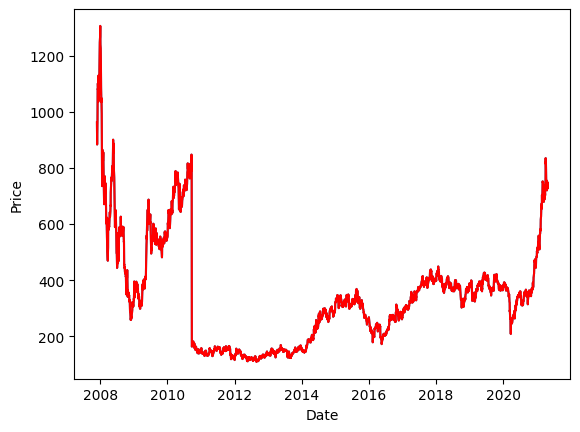

In [50]:
# X axis is price_date
price_date = df['Date']

# Y axis is price closing
price_close = df['Close']
 
# Plotting the timeseries graph of given dataset
plt.plot(price_date, price_close)
plt.plot(price_date,price_close, color='r')

plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

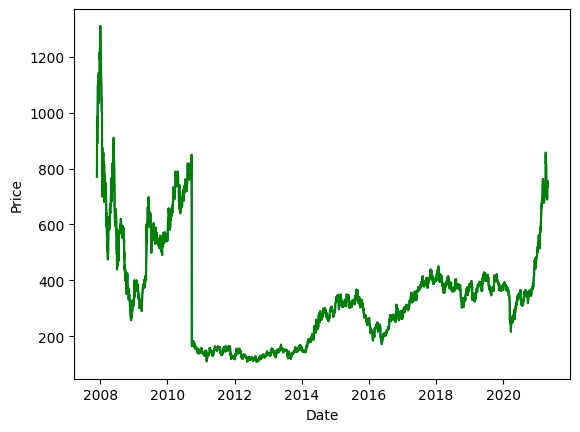

In [51]:
# X axis is price_date
price_date1 = df['Date']

# Y axis is price_Open
price_open = df['Open']
 
# Plotting the timeseries graph of given dataset
plt.plot(price_date1, price_open)
plt.plot(price_date1,price_open, color='g') 

plt.xlabel('Date')
plt.ylabel('Price')

In [77]:
Ms = MinMaxScaler()
df [df .columns] = Ms.fit_transform(df)
training_size = round(len(df) * 0.80)
train_data = df [:training_size]
test_data = df [training_size:] 

In [78]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [79]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [80]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
82/82 [==============================] - 11s 137ms/step - loss: 2.1432e-04 - mean_absolute_error: 0.0070 - val_loss: 5.9861e-05 - val_mean_absolute_error: 0.0049
Epoch 2/80
82/82 [==============================] - 8s 101ms/step - loss: 2.2496e-04 - mean_absolute_error: 0.0071 - val_loss: 7.5553e-05 - val_mean_absolute_error: 0.0059
Epoch 3/80
82/82 [==============================] - 8s 102ms/step - loss: 2.2257e-04 - mean_absolute_error: 0.0071 - val_loss: 6.0253e-05 - val_mean_absolute_error: 0.0048
Epoch 4/80
82/82 [==============================] - 9s 109ms/step - loss: 2.1929e-04 - mean_absolute_error: 0.0071 - val_loss: 6.4767e-05 - val_mean_absolute_error: 0.0050
Epoch 5/80
82/82 [==============================] - 10s 122ms/step - loss: 2.3299e-04 - mean_absolute_error: 0.0071 - val_loss: 9.0571e-05 - val_mean_absolute_error: 0.0073
Epoch 6/80
82/82 [==============================] - 11s 138ms/step - loss: 2.3493e-04 - mean_absolute_error: 0.0076 - val_loss: 9.3663e-05

In [95]:
# Merging actual and predicted data for better visualization
df3 = pd.concat([df .iloc[-614:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=df .iloc[-614:].index)], axis=1)

In [96]:
df3[['Open','Close']] = Ms.inverse_transform(df3[['Open','Close']])
df3.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2018-11-06,331.00,325.60,331.382599,331.972443
2018-11-07,329.00,326.20,327.233582,327.803192
2018-11-09,328.00,337.60,327.084167,327.328278
2018-11-12,339.00,328.65,336.428101,336.567078
2018-11-13,327.65,334.10,331.564484,332.292084


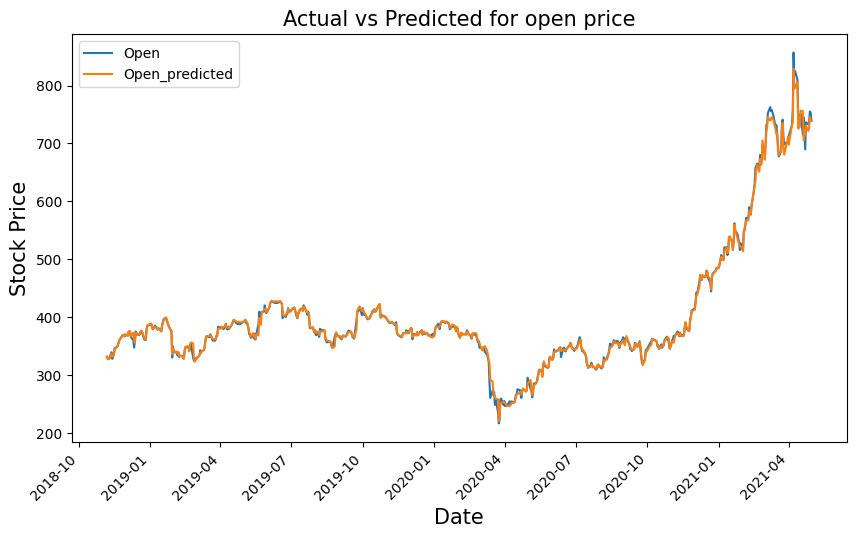

In [98]:
df3[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

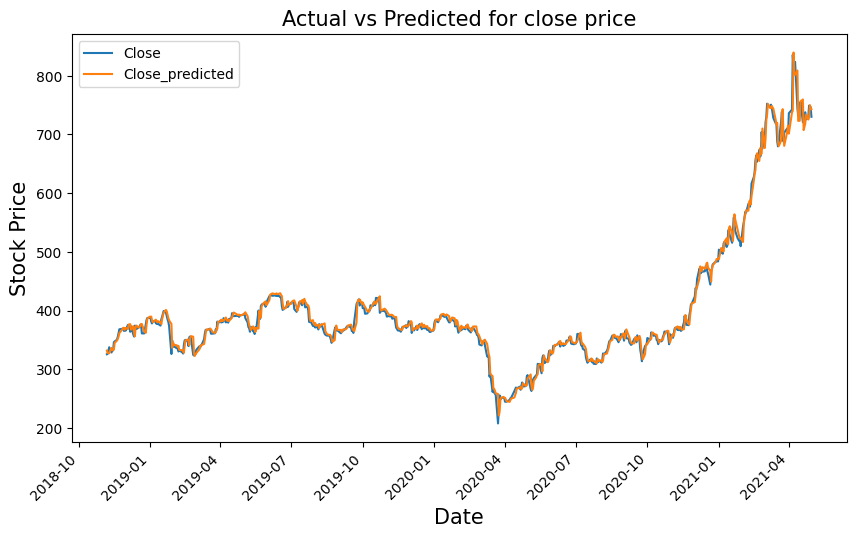

In [99]:
df3[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()